In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy import optimize 
import math
import pandas as pd

We first need generate some 'true' data. We use the  $\theta_{11} = 400$ and  $\theta_{12} = 5000$ as true parameter  $\theta$

In [2]:
def generate_obs_y_i(m,n,d):
    '''
    This function is used to generated the observation data, y
    input:
        m:   the number of model
        n:   the number of run
        d:   the design point
    output:
        obs_y: the data drawn from the 'true' distribution
    '''
    
    obs_y = []
    theta_11 = 400
    theta_12 = 5000
    
    # fix the design point
    x_i1 = d[0]
    x_i2 = d[1]
    
    sigma_square = np.random.uniform(0,1)
    
    for _ in range(n):
        # obtain the parameter
        if m == 1:
            xi_m = np.exp(-theta_11 * x_i1 * np.exp(-theta_12/x_i2))
        
        y_i = np.random.normal(xi_m,sigma_square)
        obs_y.append(y_i)
    
    return obs_y

In [3]:
# We fix the design point first
x_i1 = random.random()*150
x_i2 = random.random()*150 + 300
d = [x_i1,x_i2]

# generate 50 'true' data
obs_data = np.array(generate_obs_y_i(1,50,d))

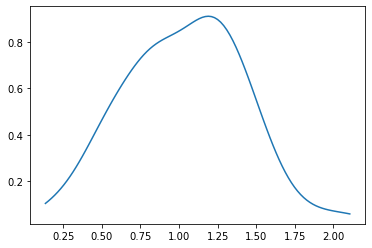

In [4]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

kde = gaussian_kde(obs_data)
dist_space = linspace(min(obs_data), max(obs_data), 100)
plt.plot(dist_space, kde(dist_space))

Next, we need to find the posterior distribution. First we let <br>
<center>$p(\theta|y) = kp(y|\theta)p(\theta) \tag{1}$</center><br>
where we let $k=1$ as the normalize constant just for convience. The likelihood function is $p(y|\theta)$ and prior is
$p(\theta)$ = obs_data.<br><br>

First, we know that $y_i$ is i.i.d and $y_i$ ~ $N(\eta_m(\theta;d_i),\sigma^2)$. Hence we can have likelihood function as<br>

$$
\begin{align}
l(\theta) =& N(y_1;\eta_m(\theta;d_i),\sigma^2) \times N(y_1;\eta_m(\theta;d_i),\sigma^2) \times ... \times N(y_n;\eta_m(\theta;d_i),\sigma^2) \\
          =& \prod_{i=0}^n N(y_i;\eta_m(\theta;d_i),\sigma^2) \tag{2}
\end{align}
$$<br>

Hence, the log-likelihood fucntion is <br>
$$
\begin{align}
L(\theta) =& log(\prod_{i=0}^n N(y_i;\eta_m(\theta;d_i),\sigma^2)) \\
          =& \sum_{i=1}^n log(N(y_i;\eta_m(\theta;d_i),\sigma^2)) \tag{3}
\end{align}
$$<br>

Then we can rewrite $\tag{1}$ as
$$
\begin{align}
p(\theta|y) =& kp(y|\theta)p(\theta) \\
            =& log(p(y|\theta)p(\theta))\\
            =& log(p(y|\theta)) + log(p(\theta))\\
            =& \sum_{i=1}^n log(N(y_i;\eta_m(\theta;d_i),\sigma^2)) + log(p(\theta)) \tag{4}
\end{align}
$$<br>
where we let k = 1 for now.




In [5]:
def mu(theta,d):
    theta_11 = theta[0]
    theta_12 = theta[1]
    x_i1 = d[0]
    x_i2 = d[1]
    
    return np.exp(-theta_11 * x_i1 * np.exp(-theta_12/x_i2))

In [6]:
def posterior(theta,y,d,sigma):
    likelihood = 0
    
    for i in range(len(y)):
        p = 1/np.sqrt(2*math.pi*sigma**2) * np.exp(-0.5* (y[i] - mu(theta,d))**2 / sigma**2)
        likelihood = likelihood + np.log(p)
    
    temp = np.ones(2) * likelihood
    
    return -likelihood 

In [14]:
theta = np.array([np.random.normal(400,25),np.random.normal(5000,250)])
sigma = np.random.uniform(0,1)

print(posterior(theta,obs_data,d,sigma))
print(theta)

optimize.minimize(posterior, theta, args=(obs_data,d,sigma))

47.700911734417765
[ 397.95117302 5075.60003718]


      fun: 47.676457875023154
 hess_inv: array([[ 21197913.57130272, -22039088.47303743],
       [-22039088.47303743,  22913644.93020164]])
      jac: array([7.15255737e-06, 5.24520874e-06])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 5
     njev: 16
   status: 0
  success: True
        x: array([-377.42416009, 5881.74392376])

### Question:
I use scipy.optimisation to implement the optimisation method to find the ${argmax}_{\theta} p(y|\theta)p(\theta)$. But the result is wrong for most of time. What kind of optimisation method R provided? I can just apply the method from R.